<img style = "float: left; margin: 30px 15px 15px 15px;" src = "https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color = "navy"> Simulación de procesos financieros. 

**Nombres:** Moisés Flores Ortiz y Miriam Eunice Rosas Medellín.

**Fecha:** 17 de marzo del 2021.

**Expediente** : 722183 y 721278.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/MoyMFO/proyecto_modulo1
# Proyecto TEMA-2

___
### 1.1 Título del trabajo.
Pronóstico del comportamiento de Covid-19 en México.

### 1.2 Objetivos.
#### 1.1 Objetivo general.
- Crear una simulación que permita pronosticar el comportamiento del Covid-19 en México y que haga posible determinar un tipo de cuarentena que minimice sus efectos económicos pero también minimice el riesgo epidémico.

#### 1.2 Objetivos específicos
- Encontrar una distribución de probabilidad adecuada que se ajuste a los datos.
- Realizar una simulación de cuatro diferentes variables que conforman el comportamiento del Covid-19.
- Pronósticar el comportamiento de Covid-19 en México en los próximos 30 días según qué tan estricta es la cuarentena.
- Generar rangos y cardinalidad para la estimación de riesgo epidémico poblacional.
- Determinar qué tipo de cuarentena dependiendo el porcentaje de movilidad garantiza un riesgo bajo.

### 1.3 Definición del problema.
El virus SARS-CoV-2, a través de la enfermedad Covid-19, ha desencadenado a nivel mundial múltiples fallecimientos en el contexto de la presente pandemia, la cual hasta ahora ha durado casi un año entero. Sin embargo, diferentes factores han hecho que en algunos países haya más casos confirmados y decesos que en otros. Algunos de estos factores están enteramente en manos del gobierno, otros son más culturales y son responsabilidad de los ciudadanos, y otros tantos no pueden ser controlados por nadie. Sean cuales sean estos factores en concreto, lo cierto es que México actualmente es el quinceavo país en el mundo con más muertes por millón de habitantes (OMS, 2020). A su vez, nuestro país es el que cuenta con la segunda tasa de letalidad más alta entre todos los países de América Latina y el Caribe.

En este contexto, se desarrollará un modelo de simulación que permita pronosticar la evolución de cuatro diferentes variables que describen el comportamiendo del Covid-19: casos confirmados, casos sospechosos, hospitalizados y defunciones; para así poder tomar decisiones acertadas acerca de los lineamientos de la cuarentena, que permitan mitigar los efectos tanto económicos como de salud pública que puedan ser provocados por la dinámica de la epidemia. Se considerará viable establecer niveles de riesgo epidémico conforme a rangos distribuidos en cuartiles para cada una de las variables utilizadas en la simulación. Además, se elegirá como estrategia, la cuarentena menos restrictiva de todas las que hagan posible llegar a un riesgo bajo antes de los próximos 30 días.

**Los supuestos son**:
- Los datos recopilados de las variables son reales.
- Se toman los datos a partir del 31 de diciembre del 2019, fecha en la cual se empezaron a recolectar los datos.
- La tasa de movilidad de los escenarios se toma sobre la movilidad real.
- La población que no se moviliza no se contagia ni se hace pruebas.
- La relación de todas las variables con riesgo epidémico es positiva.
- Todas las variables tienen el mismo peso en la estimación del riesgo epidémico.
- La cuarentena menos restrictiva minimiza sus estragos económicos.

### 1.4 Nodos y variables que se decidieron simular y porqué
**Escenarios de simulación**:
- Escenario 1 (cuarentena estricto): 10% de la población total se moviliza durante 30 días.
- Escenario 2 (cuarentena moderado): 25% de la población total se moviliza durante 30 días.
- Escenario 3 (cuarentena flexible): 50% de la población total se moviliza durante 30 días.
- Escenario 4 (cuarentena nula):     100% de la población total se moviliza durante 30 días.

**Variables de simulación**:
- Casos confirmados: Personas que cumplan con la definición operacional de caso sospechoso y que cuenten con diagnóstico confirmado por la Red Nacional de Laboratorios de Salud Pública reconocidos por el Instituto de Diagnóstico y Referencia Epidemiológicos (InDRE).
- Casos sospechosos: Personas de cualquier edad que en los últimos 7 días hayan presentado al menos dos de los siguientes signos y síntomas:
  - Tos, fiebre o dolor de cabeza. <br>
    Acompañados de al menos uno de los siguientes signos o síntomas:
  - Dificultad para respirar (dato de alarma)
  - Dolor en las articulaciones
  - Dolor muscular
  - Dolor de garganta 
  - Escurrimiento nasal
  - Conjuntivitis (enrojecimiento, picazón y ojos llorosos)
  - Dolor en el pecho (IMSS, s. f.)
- Hospitalizados: Personas que cuentan con un diagnóstico confirmado por la Red Nacional de Laboratorios de Salud Pública reconocidos por el InDRE y que han sido ingresados a una unidad hospitalaria.
- Defunciones: Personas que después de obtener un diagnóstico confirmado, fallecen a causa de la enfermedad.

Cada variable se va a simular en cada uno de los escenarios de simulación planteados previamente, con el objetivo de ubicar cada una en un cuartil que defina su cardinalidad en el riesgo epidémico poblacional. Posteriormente, crear un indicador con la sumatoria de las cardinalidades de cada una de las variables, y determinar con él el riesgo epidémico asociado a cada nodo. Las clasificaciones de riesgo son las siguientes:
- Bajo: se puede salir pero con precaución y prevención.
- Moderado: hay más actividades, pero con precaución.
- Alto: preferentemente, no salir si no es estrictamente necesario.
- Máximo: salir solamente si se trata de necesidades básicas.

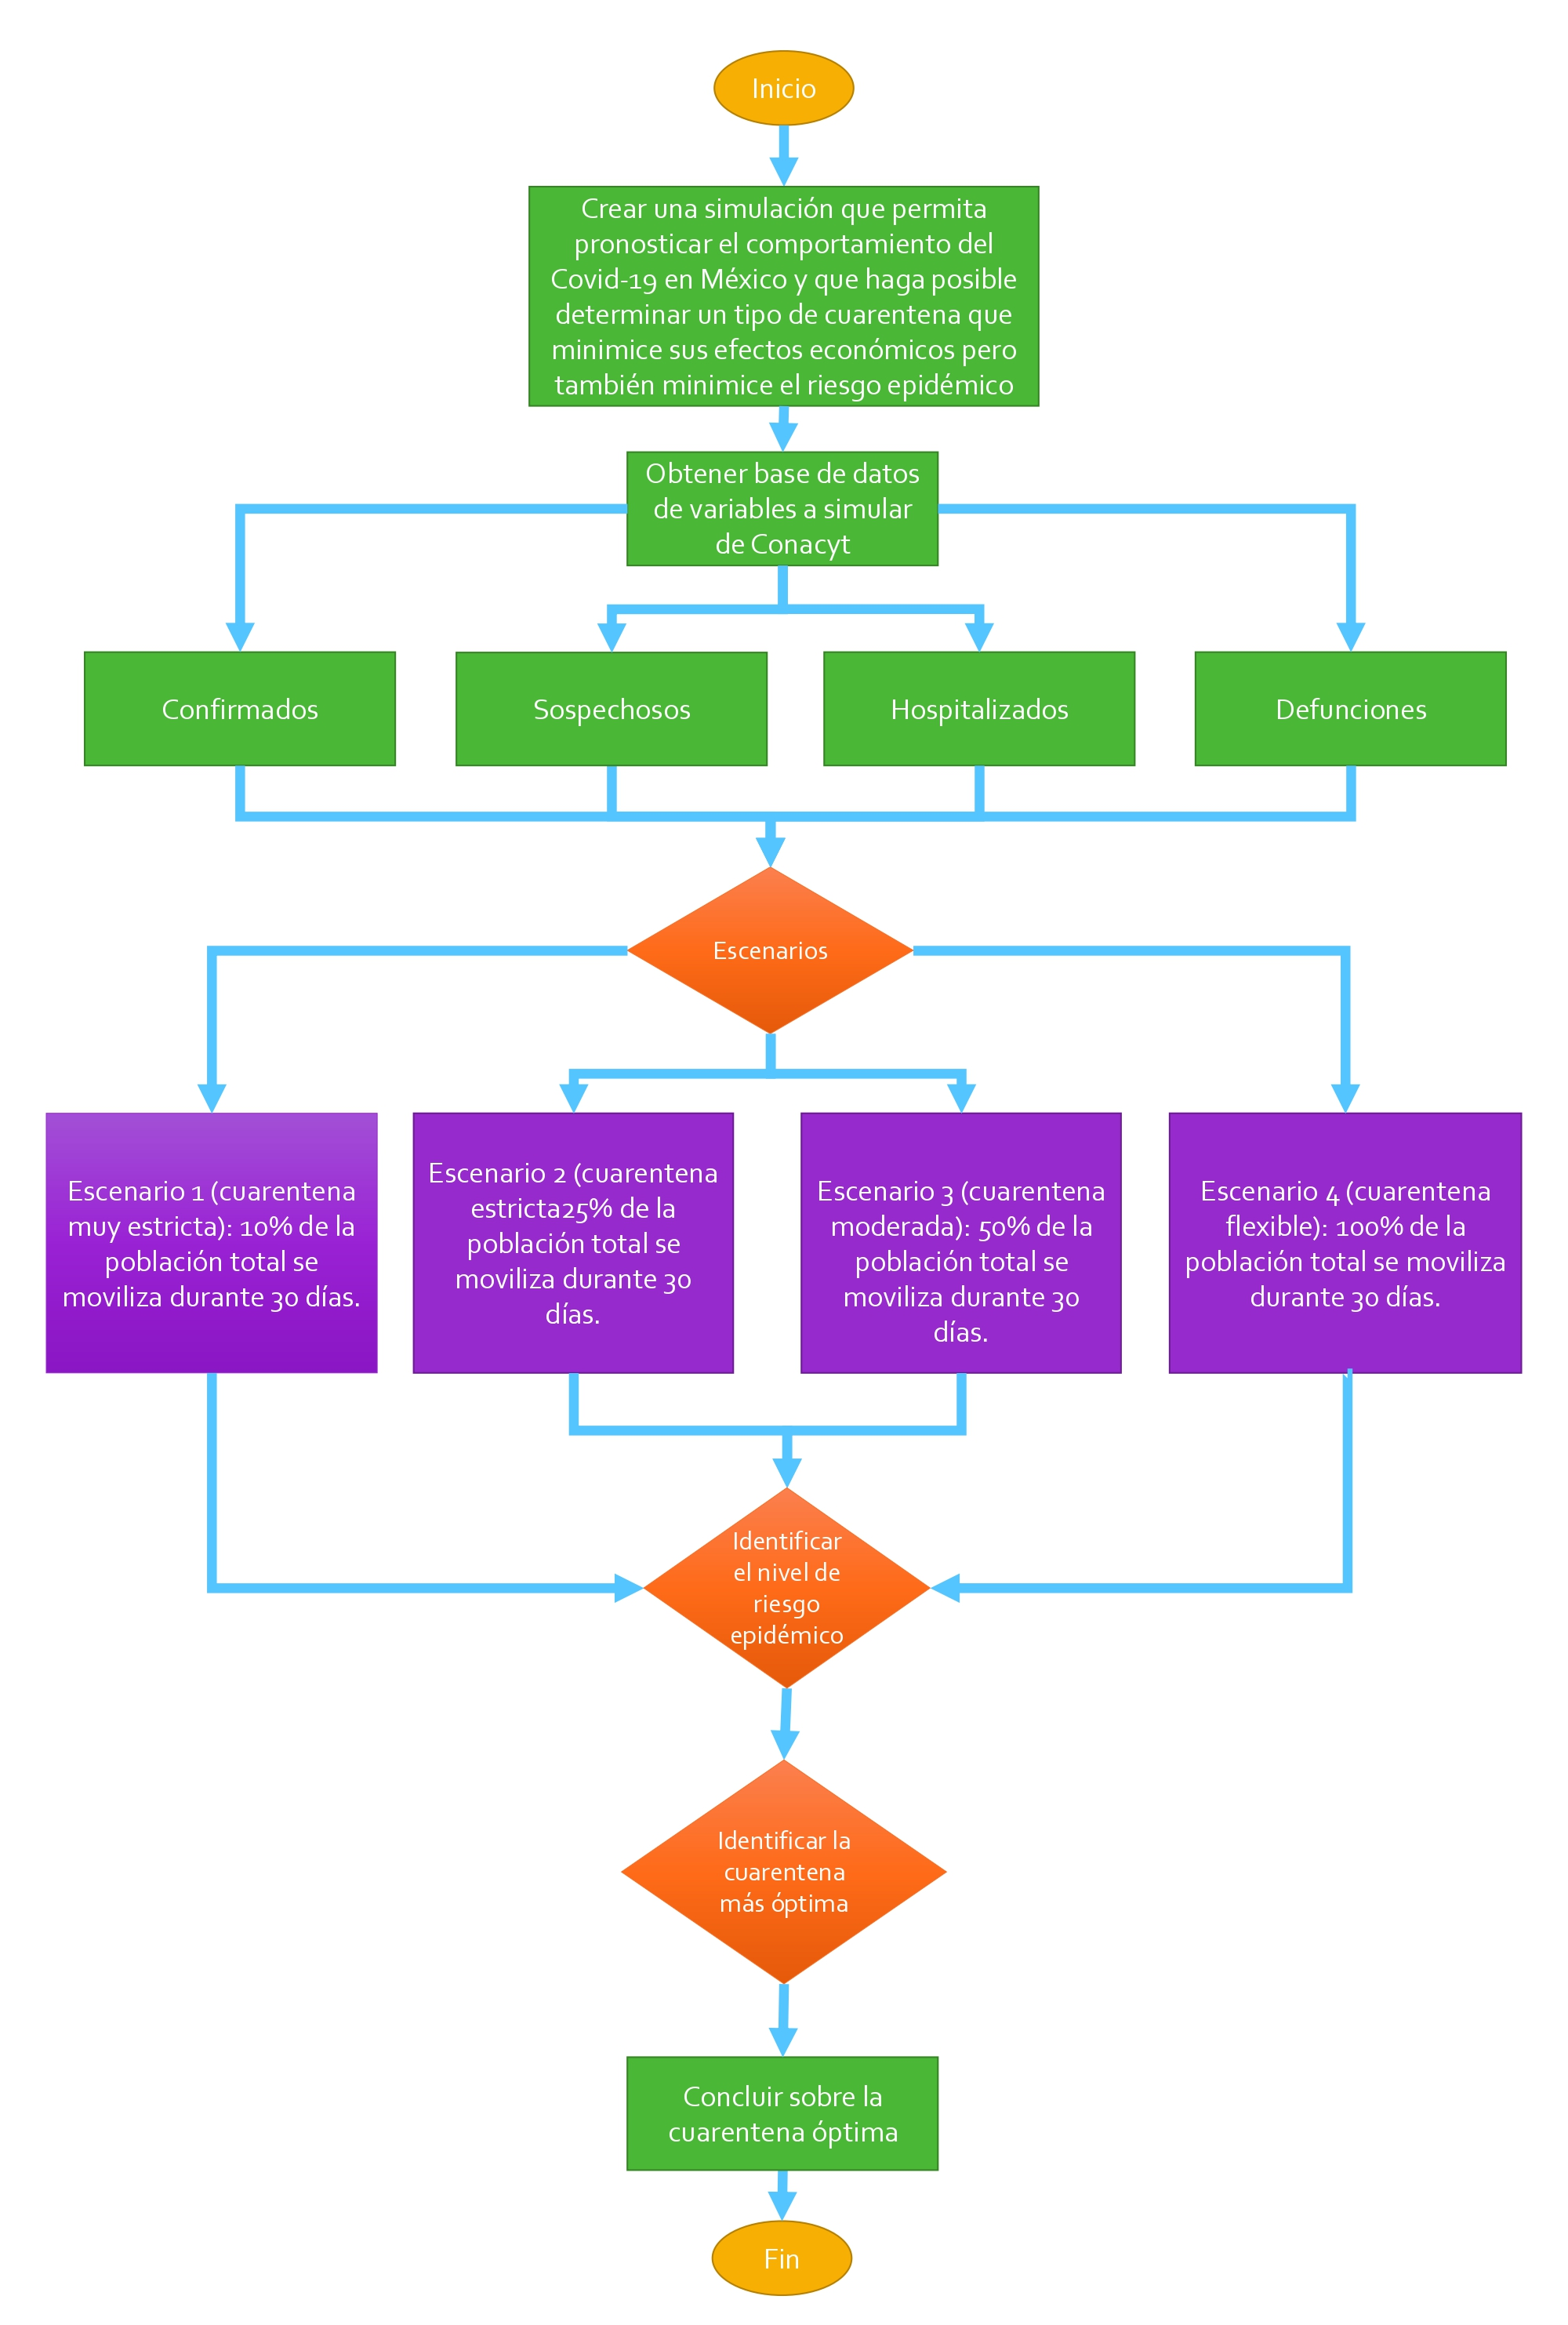

### 1.7 Referencias.
1. Consejo Nacional de Ciencia y Tecnología (2021). *Covid-19 México*. Recuperado 13 marzo 2021, de https://datos.covid-19.conacyt.mx/#DownZCSV
2. Instituto Mexicano del Seguro Social (s. f.). *Definiciones opercaciones de casos Covid-19*. Recuperado de http://educacionensalud.imss.gob.mx/es/system/files/Definiciones_operacionales_de_casos_COVID-19.pdf
3. World Health Organization. (2021). *WHO Coronavirus Disease (Covid-19) Dashboard*. Recuperado 7 marzo 2021 de https://covid19.who.int/

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>